In [1]:
# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-28,15:18].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-28,15:25].pkl"
# undersampling_interval = 10

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-29,09:47].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-29,10:58].pkl"
# undersampling_interval = 1


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_[2022-11-29,11:02].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_continuous_[2022-11-29,14:56].pkl"
# undersampling_interval = 1

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_[2022-11-29,15:56].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_continuous_[2022-11-29,16:19].pkl"
# undersampling_interval = 10


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_mock_[2022-12-02,08:57].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,09:17].pkl"
# undersampling_interval = 8


# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,10:13].pkl"
# undersampling_interval = 10

###### Everything above here doesn't have participant indices recorded!



# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl"
# undersampling_interval = 10





# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl"
# undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl"
undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl"
# undersampling_interval = 10




In [2]:
from src.data.util import open_file_pickle
import torch
import numpy as np
from src.util.util import milliseconds_to_samples, samples_to_milliseconds
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import fields
from sklearn.metrics import classification_report

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# test_metrics = open_file_pickle(test_metrics_path)
test_metrics_continuous = open_file_pickle(test_metrics_path_continuous)

In [4]:
[field.name for field in fields(test_metrics_continuous)]

['y_true',
 'y_predicted',
 'y_variance',
 'y_in_distribution',
 'y_subj_idx',
 'y_true_matrix',
 'y_predicted_matrix',
 'statscores',
 'precision',
 'recall',
 'negative_predictive_value',
 'accuracy_conf_matrix',
 'f1_score',
 'mcc',
 'n_mcc']

In [5]:
test_metrics_continuous.y_true

tensor([0, 0, 0,  ..., 0, 0, 0])

In [6]:
test_metrics_continuous.y_predicted.mean()

tensor(0.7785)

In [7]:
test_metrics_continuous.y_variance

tensor([1.2343e-06, 6.3706e-06, 1.3336e-06,  ..., 4.6532e-03, 3.6080e-03,
        2.1881e-03])

In [8]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [9]:
# test_metrics.y_predicted[(test_metrics.y_predicted > 0) & (test_metrics.y_predicted < 1)]

In [10]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5).numpy().mean()

0.11193445226648352

In [11]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5)[test_metrics_continuous.y_in_distribution].numpy().mean()

0.8604564160119715

In [12]:
event_indices = np.where(test_metrics_continuous.y_in_distribution.numpy())

In [13]:
y_true_id = 1 - test_metrics_continuous.y_true.clone().double()
y_true_id[~test_metrics_continuous.y_in_distribution] = 0.5

In [14]:
y_true_id[~test_metrics_continuous.y_in_distribution]

tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
       dtype=torch.float64)

tensor(1)


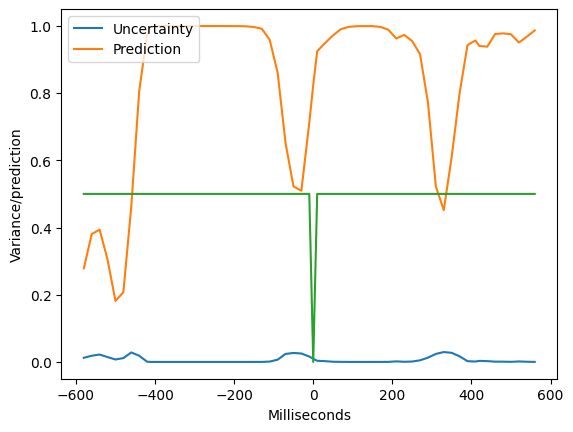

tensor(1)


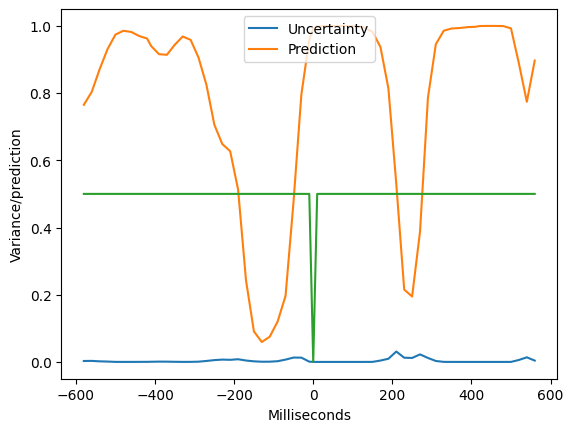

tensor(1)


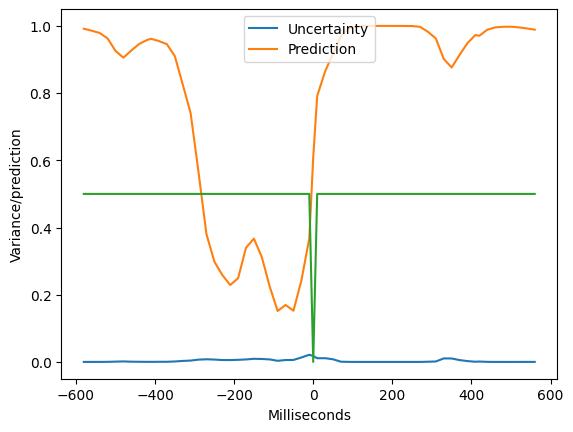

tensor(1)


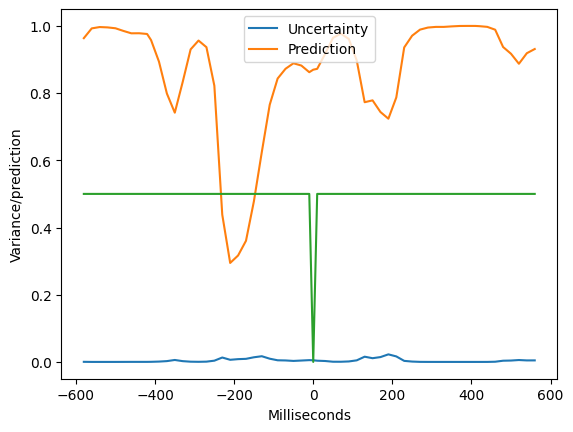

tensor(1)


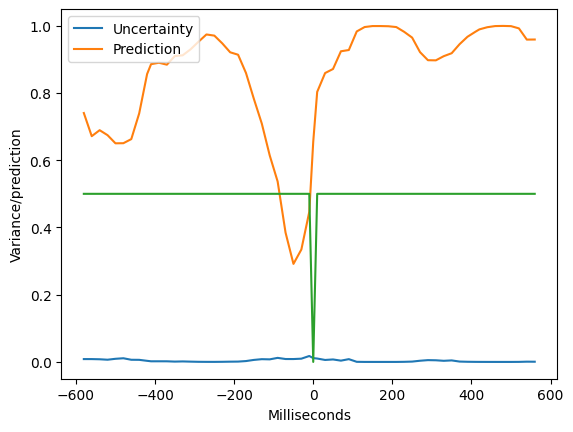

tensor(1)


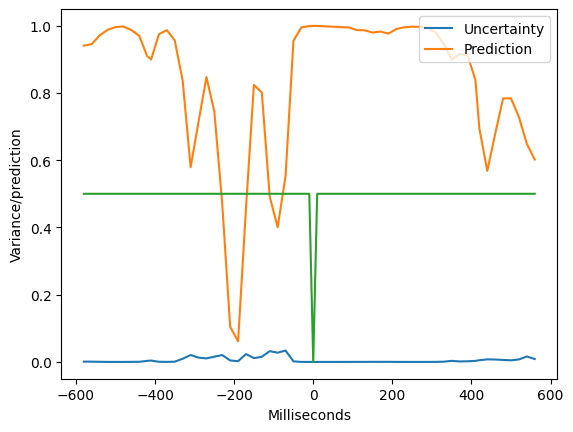

tensor(1)


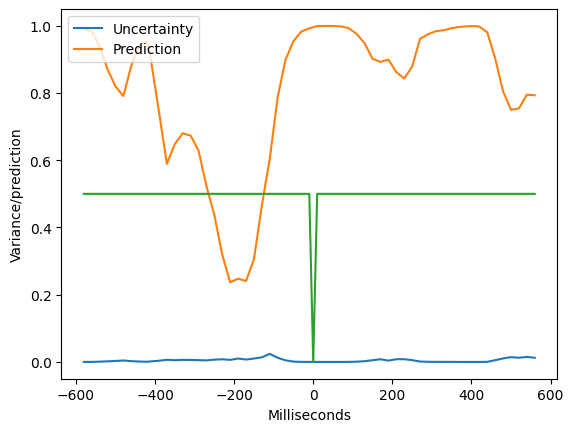

tensor(1)


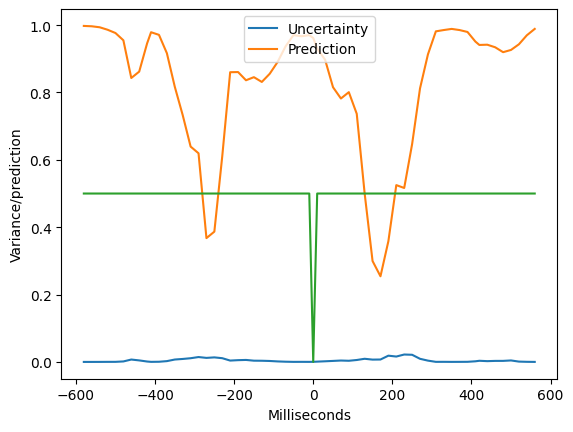

tensor(1)


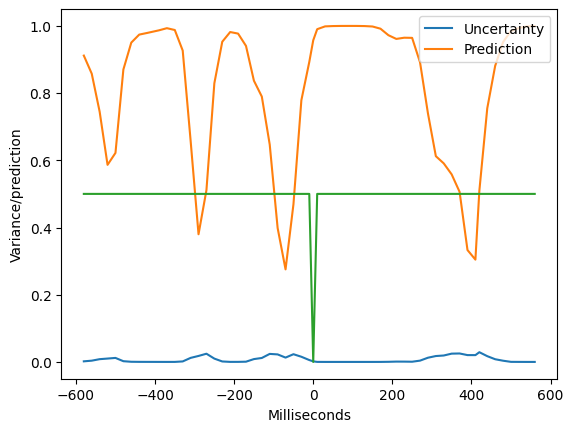

tensor(1)


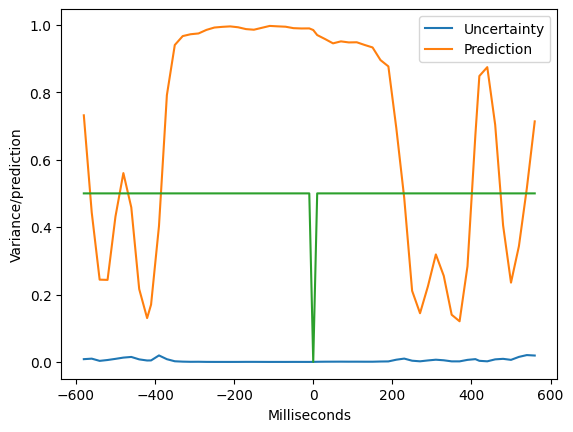

In [ ]:
lower_window_ms = -600
upper_window_ms = 600
lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling_interval)
upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling_interval)
event_index = 1


x = [samples_to_milliseconds(step) * undersampling_interval for step in range(lower_window, upper_window)]

# for event_index in range(len(event_indices[0])):
for event_index in range(10):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    print(y_true)
    
    # if y_true:
    #     continue

    color = "green" if y_true else "red"

    plt.plot(x, test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Uncertainty")
    plt.plot(x, test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.xlabel("Milliseconds")
    plt.ylabel("Variance/prediction")
    plt.legend()
    # plt.vlines([-50, 0, 50], ymin=0, ymax=1, color=[color])
    plt.plot(x, y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.show()

In [ ]:
event_indices

(array([   588,    740,    964, ..., 557363, 557484, 557595]),)

In [ ]:
test_metrics_continuous.y_variance

tensor([1.2343e-06, 6.3706e-06, 1.3336e-06,  ..., 4.6532e-03, 3.6080e-03,
        2.1881e-03])

In [ ]:
samples_to_milliseconds(50 / undersampling_interval)

9

In [ ]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [ ]:
def make_average_around_event(lower_window_ms, upper_window_ms, undersampling=undersampling_interval, y_to_plot=None, label_prefix=""):
    lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling)
    upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling)


    x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]


    y_variances = []
    y_predictions = []
    y_trues = []
    y_subj = []
    for event_index in range(len(event_indices[0])):
        y_true = 1 - (test_metrics_continuous.y_true[event_indices[0][event_index]])
        # print(y_true)

        if y_to_plot != None and y_to_plot != y_true:
            continue

        color = "green" if y_true else "red"

        y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_predictions.append(1 - test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])

    
    
    stacked_subjects = torch.vstack(y_subj)
    stacked_variances = torch.vstack(y_variances)
    stacked_predictions = torch.vstack(y_predictions)
    stacked_trues = torch.vstack(y_trues)
    
    predictions_per_participant = []
    variances_per_participant = []
    trues_per_participant = []

    for i in range(1, 7):
        predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

    avg_variances = torch.vstack(variances_per_participant).mean(axis=0)
    std_variances = torch.vstack(variances_per_participant).std(axis=0)

    avg_predictions = torch.vstack(predictions_per_participant).mean(axis=0)
    std_predictions = torch.vstack(predictions_per_participant).std(axis=0)

    avg_trues = torch.vstack(trues_per_participant).mean(axis=0)
    std_trues = torch.vstack(trues_per_participant).std(axis=0)



    plt.plot(x, avg_variances, label=f"{label_prefix}Uncertainty")
    plt.fill_between(x, avg_variances - std_variances, avg_variances + std_variances , label=f"_{label_prefix}Variances", alpha=0.1)


    plt.plot(x, avg_predictions, label=f"{label_prefix}Predictions")
    plt.fill_between(x, avg_predictions - std_predictions, avg_predictions + std_predictions , label=f"_{label_prefix}Predictions", alpha=0.1)

    plt.plot(x, avg_trues, label=f"{label_prefix}Truths")
    plt.fill_between(x, avg_trues - std_trues, avg_trues + std_trues , label=f"_{label_prefix}Truths", alpha=0.1)

    # plt.legend()
    plt.xlabel("Time (ms)")
    plt.ylabel("Variance / prediction")
    plt.ylim(0, 1)
    # plt.show()

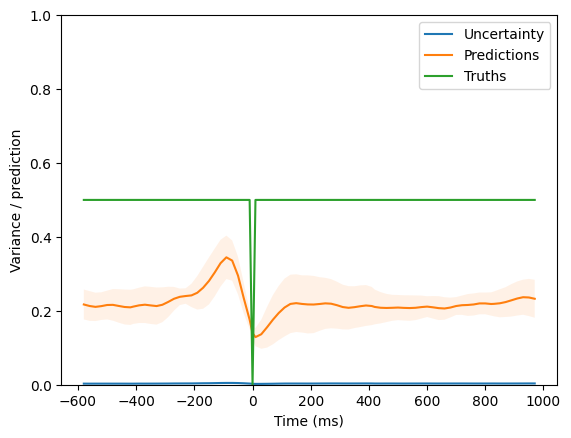

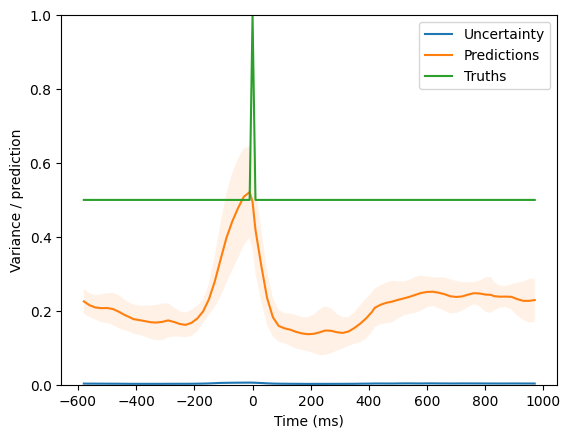

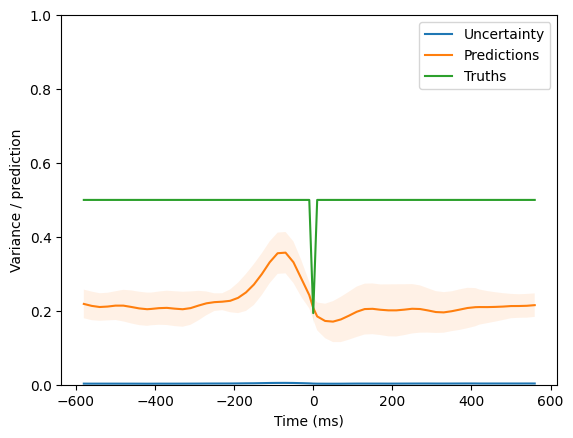

In [ ]:
make_average_around_event(-600, 1000, y_to_plot = 0)
plt.legend()
plt.show()
make_average_around_event(-600, 1000, y_to_plot = 1)
plt.legend()
plt.show()
make_average_around_event(-600, 600, y_to_plot = None)
plt.legend()
plt.show()

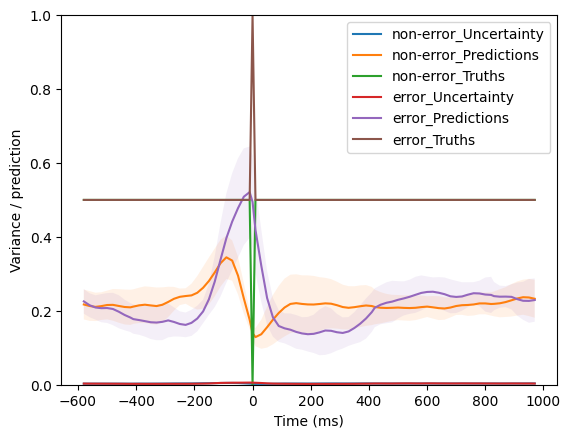

In [ ]:
make_average_around_event(-600, 1000, y_to_plot = 0, label_prefix="non-error_")
make_average_around_event(-600, 1000, y_to_plot = 1, label_prefix="error_")
plt.legend()
plt.show()

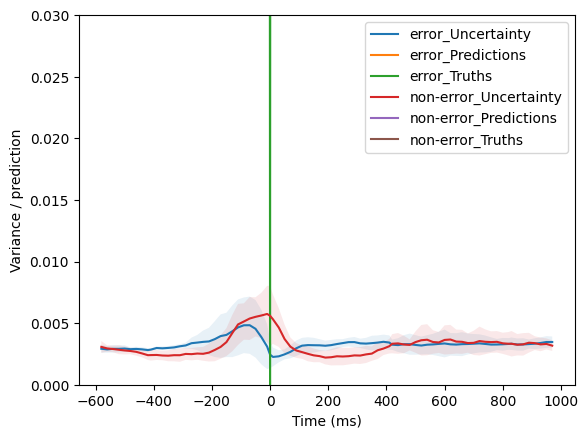

In [ ]:
make_average_around_event(-600, 1000, y_to_plot = 0, label_prefix="error_")
make_average_around_event(-600, 1000, y_to_plot = 1,label_prefix="non-error_")
plt.legend()
plt.ylim(0.0, 0.03)
plt.show()

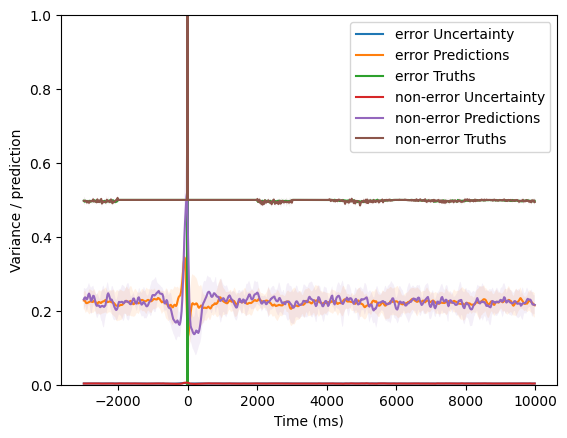

In [ ]:
make_average_around_event(-3000, 10000, y_to_plot = 0, label_prefix="error ")
make_average_around_event(-3000, 10000, y_to_plot = 1, label_prefix="non-error ")
plt.legend()
plt.show()

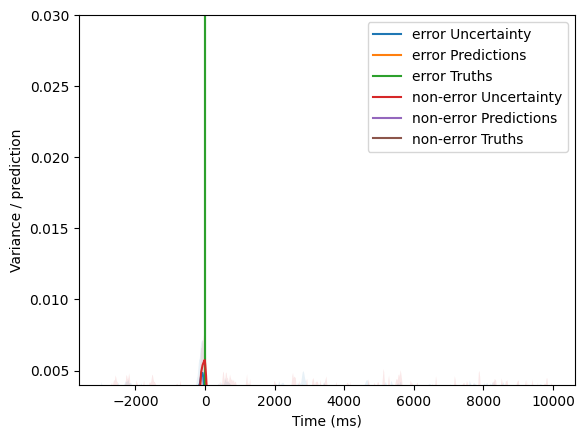

In [ ]:
make_average_around_event(-3000, 10000, y_to_plot = 0, label_prefix="error ")
make_average_around_event(-3000, 10000, y_to_plot = 1, label_prefix="non-error ")
plt.legend()
plt.ylim(0.004, 0.03)
plt.show()

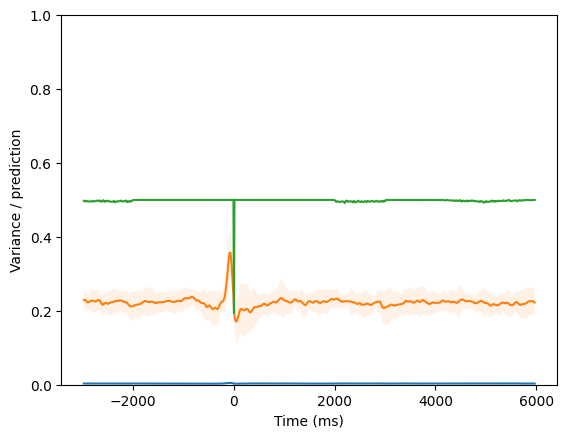

In [ ]:
make_average_around_event(-3000, 6000, y_to_plot = None)

In [ ]:
# distances_to_next_event = []
# for i in tqdm(range(len(test_metrics_continuous.y_variance))):
#     distances = [i for i in event_indices[0] - i if i > 0]
#     if not distances:
#         continue
#     distances_to_next_event.append(min(distances))

In [ ]:
# plt.scatter(distances_to_next_event, test_metrics_continuous.y_variance[:len(distances_to_next_event)], alpha=0.1)
# plt.xlabel("Distance to next event")
# plt.ylabel("Uncertainty")
# plt.xlim(-1, 500)
# plt.ylim(-1, 20)

In [ ]:
# distances_since_last_event = []
# for i in tqdm(range(len(test_metrics_continuous.y_variance))):
#     distances = [i for i in event_indices[0] - i if i < 0]
#     if not distances:
#         continue
#     distances_since_last_event.append(abs(max(distances)))

# plt.scatter(distances_to_next_event, test_metrics_continuous.y_variance[:len(distances_to_next_event)], alpha=0.1)
# plt.xlabel("Distance since last event")
# plt.ylabel("Uncertainty")
# plt.xlim(-1, 5000)
# plt.ylim(-1, 20)

In [ ]:
# distances_to_nearest_event = []
# for i in tqdm(range(len(test_metrics_continuous.y_variance))):
#     distances_to_nearest_event.append(min(abs(event_indices[0] - i)))

# plt.scatter(distances_to_nearest_event, test_metrics_continuous.y_variance, alpha=0.1)
# plt.xlabel("Distance to nearest event")
# plt.ylabel("Uncertainty")
# # plt.xlim(-1, 50)
# plt.ylim(-1, 20)




In [ ]:
# lower_window_m
# lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling)
# upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling)


# x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]


y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    # print(y_true)

    # if y_to_plot != None and y_to_plot != y_true:
    #     continue

    color = "green" if y_true else "red"

    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


In [ ]:
stacked_predictions = torch.vstack(y_predictions)

In [ ]:
stacked_subjects = torch.vstack(y_subj)

In [ ]:
predictions_per_participant = []
stacked_predictions = torch.vstack(y_predictions)
for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(stacked_subjects.shape[1], -1).mean(axis=1))

In [ ]:
torch.vstack(predictions_per_participant).shape


torch.Size([6, 60])

In [ ]:
torch.vstack(y_predictions).shape

torch.Size([2673, 60])

In [ ]:
y_variances = []
y_predictions = []
y_trues = []
y_subj = []
y_id = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    # print(y_true)

    # if y_to_plot != None and y_to_plot != y_true:
    #     continue

    color = "green" if y_true else "red"

    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])



stacked_subjects = torch.vstack(y_subj)
stacked_variances = torch.vstack(y_variances)
stacked_predictions = torch.vstack(y_predictions)
stacked_trues = torch.vstack(y_trues)

predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []

for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))

In [ ]:
torch.vstack(predictions_per_participant).shape

torch.Size([2673, 60])

In [ ]:
test_metrics_continuous.y_predicted 

tensor([0.9993, 0.9985, 0.9991,  ..., 0.2953, 0.2074, 0.1671])

In [ ]:
from sklearn.metrics import roc_curve, auc

Best Threshold=0.595355, G-Mean=0.756


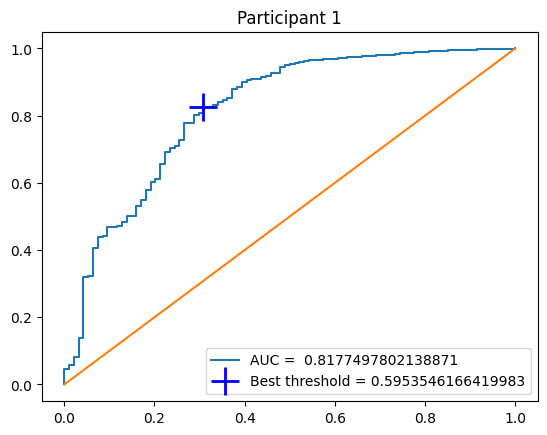

Best Threshold=0.601167, G-Mean=0.767


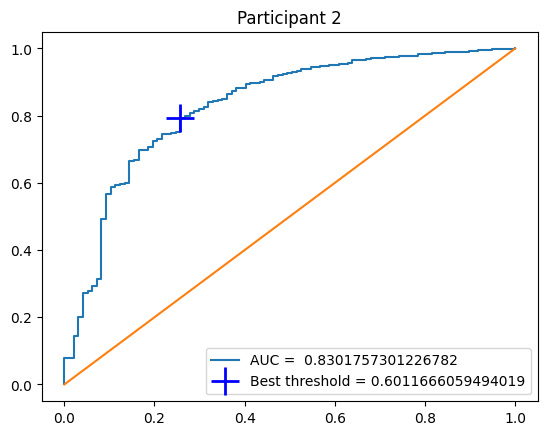

Best Threshold=0.507987, G-Mean=0.844


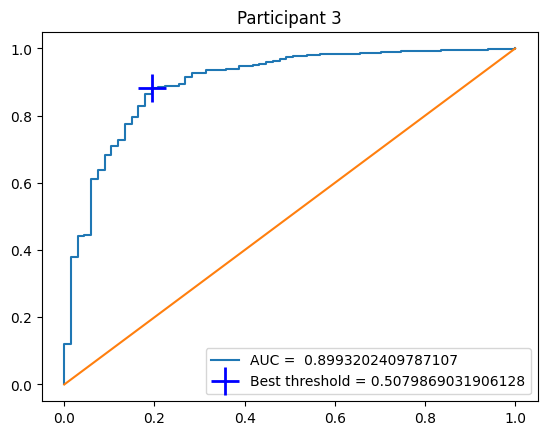

Best Threshold=0.738426, G-Mean=0.624


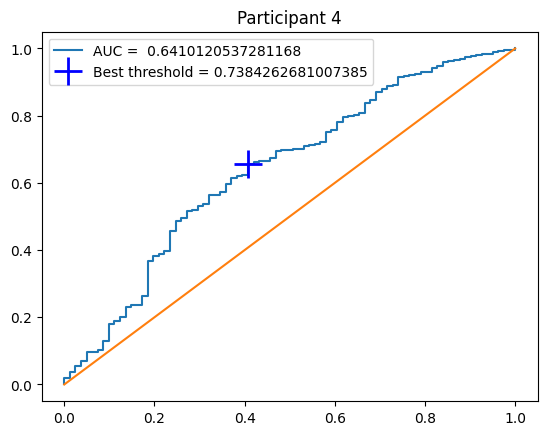

Best Threshold=0.732384, G-Mean=0.625


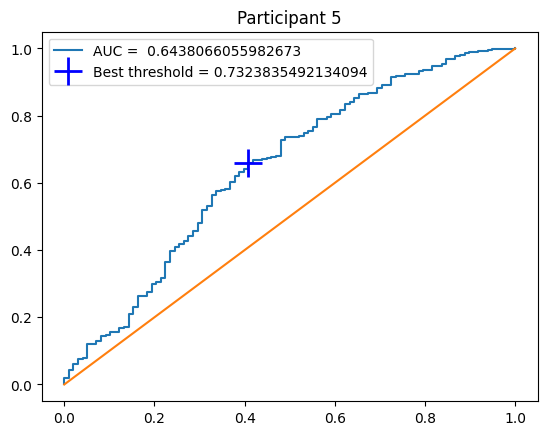

Best Threshold=0.837689, G-Mean=0.743


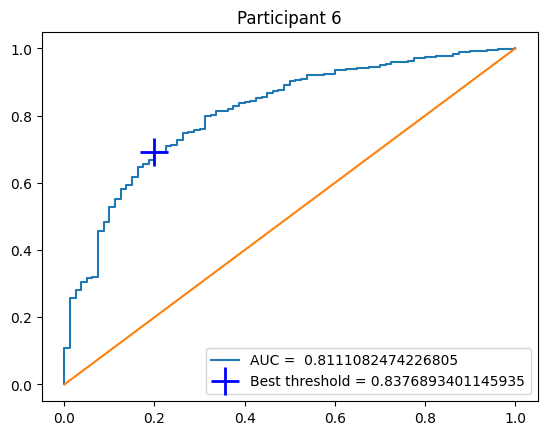

In [ ]:
optimal_thresholds = []
for i, zipped in enumerate(zip(trues_per_participant, predictions_per_participant)):
    participant_trues, participant_predictions = zipped
    binarized_participant_trues = participant_trues.clone()
    binarized_participant_trues[binarized_participant_trues == 0.5] = 0
    fpr, tpr, thresholds = roc_curve(1 - binarized_participant_trues.reshape(-1),  participant_predictions.reshape(-1))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    optimal_thresholds.append(thresholds[ix])
    plt.plot(fpr, tpr, label=f"AUC =  {auc(fpr, tpr)}")
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
    plt.plot(fpr[ix], tpr[ix], 'b+', mew=2, ms=20, label=f"Best threshold = {thresholds[ix]}")
    plt.legend()
    plt.title(f"Participant {i +1}")
    plt.show()

In [ ]:
participant_trues.shape

torch.Size([454, 60])

In [ ]:
participant_predictions.shape

torch.Size([454, 60])

In [ ]:
trues_per_participant[0]

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
       dtype=torch.float64)

In [ ]:
fpr[ix]
tpr[ix]

0.6904270986745213

In [ ]:
epochs = [120, 45, 100, 39, 68, 49, 36, 55, 30, 67, 18]
acc_val = [0.911, 0.854, 0.879, 0.824, 0.873, 0.852, 0.714, 0.902, 0.757, 0.843, 0.755]
acc_test = [0.729, 0.751, 0.739, 0.69, 0.718, 0.693, 0.667, 0.725, 0.678, 0.718, 0.691]

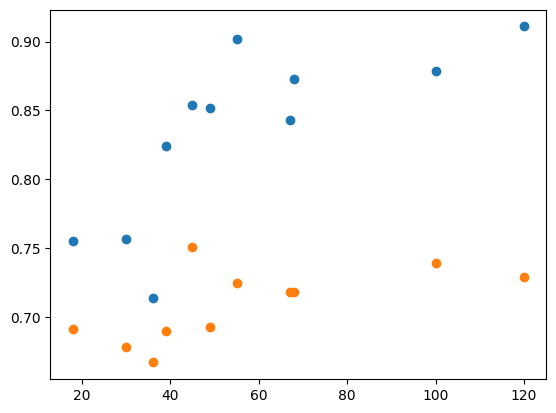

In [ ]:
plt.scatter(epochs, acc_val)
plt.scatter(epochs, acc_test)

In [ ]:
(abs(test_metrics_continuous.y_true[test_metrics_continuous.y_in_distribution] - test_metrics_continuous.y_predicted[test_metrics_continuous.y_in_distribution]) < 0.5).sum()



tensor(2300)

In [ ]:
test_metrics_continuous.y_in_distribution.sum()

tensor(2673)

In [55]:
all_truths = []
all_preds = []

for i, trues, predictions, threshold in zip(range(0, len(trues_per_participant)), trues_per_participant, predictions_per_participant, optimal_thresholds):
    truths = trues[trues != 0.5] 
    preds = predictions[trues != 0.5] < threshold
        
    print(f"Participant {i+1}")    
    print(classification_report(truths.reshape(-1).numpy(), preds.reshape(-1).numpy()))
    all_truths.append(truths.reshape(-1))
    all_preds.append(preds.reshape(-1))
        
print("Averaged over all participants")        
print(classification_report(torch.hstack(all_truths).reshape(-1), torch.hstack(all_preds).reshape(-1)))

Participant 1
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       344
         1.0       0.72      0.69      0.71        94

    accuracy                           0.88       438
   macro avg       0.82      0.81      0.81       438
weighted avg       0.87      0.88      0.88       438

Participant 2
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       348
         1.0       0.72      0.74      0.73        97

    accuracy                           0.88       445
   macro avg       0.82      0.83      0.83       445
weighted avg       0.88      0.88      0.88       445

Participant 3
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       382
         1.0       0.61      0.81      0.70        67

    accuracy                           0.90       449
   macro avg       0.79      0.86      0.82       449
weighted avg       0.91      0.9

In [ ]:
(trues_per_participant[0][trues_per_participant[0] != 0.5] == (predictions_per_participant[0][trues_per_participant[0] != 0.5] < optimal_thresholds[0])).numpy().mean()

0.8767123287671232

In [ ]:
optimal_thresholds[0]

0.5953546

In [ ]:
predictions_per_participant[0] < optimal_thresholds[0]

tensor([[ True,  True,  True,  ..., False, False, False],
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False,  True,  True],
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False]])